# TP1 - Exercício 2
## Grupo 1

*   Diogo Coelho da Silva A100092
*   Pedro Miguel Ramôa Oliveira A97686


**Problema proposto:**

Um sistema de tráfego é representado por um **grafo orientado ligado**. Os nodos destacam pontos de acesso e os arcos destacam vias de comunicação com sentido único. O grafo deve ser **ligado**: entre cada par de nodos $ \langle n_1, n_2 \rangle $ deve existir um caminho $ n_1 \leadsto n_2 $ e um caminho $ n_2 \leadsto n_1 $.

**a)**
Gerar aleatoriamente o grafo com $ N \in \{6..10\} $ nodos e com ramos que satisfaçam as seguintes condições:

1. Cada nodo tem um número aleatório de descendentes $ d \in \{1 .. 3\} $, cujos destinos são também gerados aleatoriamente.
2. Se existirem *loops* ou destinos repetidos, deve-se gerar outro grafo.

**b)**
Pretende-se fazer manutenção, interrompendo determinadas vias. Determinar o maior número de vias que é possível remover mantendo o grafo **ligado**.


**Proposta de resolução:**

O problema proposto tem como objetivo gerar um grafo que represente um sistema de tráfego. O desafio principal é garantir que o grafo gerado seja conexo, isto é, que exista um caminho entre qualquer par de nodos em ambas as direções.

Na nossa solução, o grafo é gerado aleatoriamente, garantindo que cada nodo tenha entre 1 e 3 descendentes escolhidos aleatoriamente, sem permitir loops ou arestas duplicadas. Em seguida, o grafo é verificado para garantir que este é um grafo ligado. Se não estiver ligado, o processo de geração é repetido até que essa condição seja satisfeita.

Além disso, o problema envolve a manutenção das vias de tráfego, onde o objetivo é determinar o maior número de arestas que podem ser removidas mantendo o grafo conexo. Para isso, é utilizado um algoritmo que testa diferentes combinações de remoção de arestas e verifica se a conectividade do grafo é mantida.





#### 1.Importações Necessárias
Para resolver este problema, utilizaremos bibliotecas especializadas para manipulação
de grafos e visualização. O código começa com a importação das seguintes bibliotecas:

In [12]:
from IPython import get_ipython
from IPython.display import display
import networkx as nx
import random
import matplotlib.pyplot as plt
from itertools import combinations

- `networkx`: Biblioteca utilizada para criar e manipular grafos.
- `random`: Usada para gerar números aleatórios-
- `matplotlib`: Utilizada para a visualização do grafo.
- `itertools`: Contém funções que auxiliam na manipulação de estruturas como
combinações, usadas para testar subconjuntos de arestas removíveis.

#### 2.Função para gerar um grafo fortemente conectado

A função `geraGrafo(N)` cria um grafo com N nós, garantindo que este seja conexo. Cada nó tem um número aleatório de 1 a 3 descendentes, escolhidos entre os nós disponíveis.


In [13]:
def geraGrafo(N):
    while True:
        grafo = nx.Graph()  # Inicia um novo grafo

        # Adicionar os nós ao grafo
        grafo.add_nodes_from(range(N))

        # Conectar cada nó com 1 a 3 vizinhos
        for nodo in grafo.nodes():
            numVizinhos = random.randint(1, 3)  # Número de vizinhos para o nodo atual
            vizinhosPotenciais = []  # Lista para armazenar vizinhos potenciais

            # Encontrar vizinhos potenciais
            for n in grafo.nodes():
                if n != nodo and not grafo.has_edge(nodo, n):  # Verifica se o nodo não é o mesmo e se não existe aresta
                    vizinhosPotenciais.append(n)

            # Selecionar vizinhos aleatórios
            nodesVizinhos = []
            numeroDeOpcoes = min(numVizinhos, len(vizinhosPotenciais))  # Garantir que não exceda disponíveis
            if numeroDeOpcoes > 0:
                indicesSelecionados = random.sample(range(len(vizinhosPotenciais)), numeroDeOpcoes)
                for indice in indicesSelecionados:
                    nodesVizinhos.append(vizinhosPotenciais[indice])  # Adiciona os vizinhos selecionados

            # Adicionar as arestas entre o nodo e seus vizinhos
            for vizinho in nodesVizinhos:
                grafo.add_edge(nodo, vizinho)

        # Verificar se o grafo é conexo
        if nx.is_connected(grafo):  # Retorna o grafo se for conexo
            return grafo



#### 3.Função para encontrar arestas removíveis
A função encontrarMaxArestasRemoviveis(G) verifica quais arestas podem ser removidas do grafo sem que esteja deixe de ficar ligado.

In [14]:
def encontrarMaxArestasRemoviveis(G):
    maxArestasRemoviveis = set() 
    for i in range(len(G.edges()), 0, -1):
        for conjuntoArestas in combinations(G.edges(), i):
            G_temp = G.copy() 
            G_temp.remove_edges_from(conjuntoArestas) 
            if nx.is_connected(G_temp):  
                return set(conjuntoArestas)  
    return maxArestasRemoviveis 


   Um conjunto vazio `maxArestasRemoviveis` é criado para armazenar as arestas que podem ser removidas.

   A função itera sobre o número de arestas do grafo, começando pelo total de arestas e descendo até zero. Para cada valor `i`, gera todas as combinações possíveis de `i` arestas.

Para cada combinação de arestas, a função cria uma cópia temporária do grafo original (`G_temp`). As arestas da combinação atual são removidas da cópia do grafo (`G_temp`).

A função verifica se a cópia do grafo ainda é conexa após a remoção das arestas. 
Se a cópia permanecer conexa, a função retorna as arestas removidas como um conjunto.

Se nenhuma aresta puder ser removida, a função retorna um conjunto vazio.








Função para Plotar o Grafo
A função plot_graph(G, title) visualiza o grafo utilizando Matplotlib.

#### 4.Representação do grafo

In [15]:
def plot_graph(G, title):
    pos = nx.spring_layout(G)  # Define a posição dos nós
    plt.figure(figsize=(8, 6))  # Define o tamanho da figura

    # Desenha os nós
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)
    # Desenha as arestas
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowstyle='->', arrowsize=20)
    # Desenha os rótulos dos nós
    nx.draw_networkx_labels(G, pos, font_size=15, font_color='black', font_weight='bold')

    plt.title(title)  # Define o título do gráfico
    plt.show()  # Mostra o gráfico

#### 5.Execução do código
O código a seguir executa todas as etapas: gera um grafo fortemente conectado,
encontra as arestas removíveis, remove-as e representa tanto o grafo original quanto o grafo resultante da remoção das arestas.

Grafo original com 10 nós:
Arestas do grafo original: [(0, 1), (0, 6), (0, 5), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 9), (2, 6), (3, 6), (3, 7), (4, 8), (5, 8), (6, 7), (6, 9), (8, 9)]


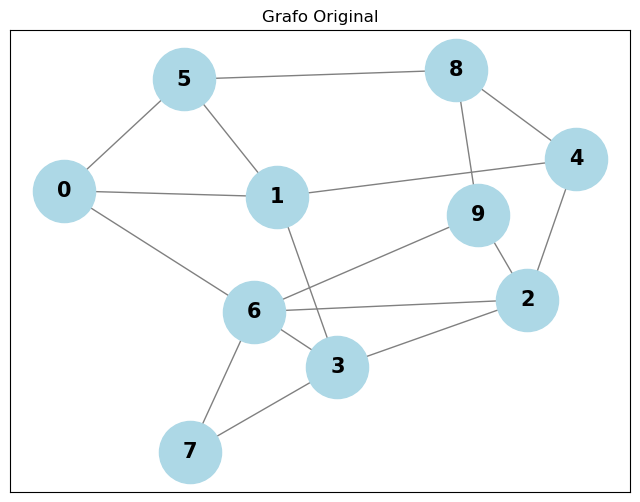

Número de arestas removíveis mantendo o grafo ligado: 8
Arestas removíveis: {(0, 1), (2, 4), (1, 4), (0, 6), (2, 3), (2, 9), (3, 6), (1, 3)}
Grafo resultante após remoção das arestas:


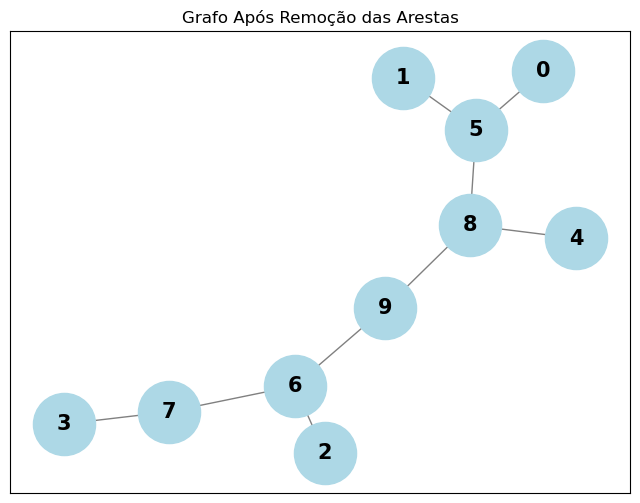

In [16]:
# Geração do grafo
N = random.randint(6, 10)  # Número aleatório de nós
G = geraGrafo(N)  # Gera o grafo

print(f"Grafo original com {N} nós:")
print(f"Arestas do grafo original: {list(G.edges())}")
plot_graph(G, "Grafo Original")  # Desenha o grafo original

# Encontrar arestas removíveis
arestasRemoviveis = encontrarMaxArestasRemoviveis(G)

# Criar um novo grafo após a remoção das arestas
G_result = G.copy()
G_result.remove_edges_from(arestasRemoviveis)

print(f"Número de arestas removíveis mantendo o grafo ligado: {len(arestasRemoviveis)}")
print(f"Arestas removíveis: {arestasRemoviveis}")

# Verificar a presença das arestas a serem removidas no grafo original
for aresta in arestasRemoviveis:
    if G.has_edge(*aresta) == False:
        print(f"Erro: a aresta {aresta} não está presente no grafo original!")

print("Grafo resultante após remoção das arestas:")
plot_graph(G_result, "Grafo Após Remoção das Arestas")  # Desenha o grafo após remoção das arestas